In [3]:
from util import *
# Load some libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import math 

# Load in the data 
N = 100
df = get_data(N, random_seed = 42)
df.head()

,alpha,rho,velocity,f_drag
0,16.854305,1.319114,79.481130,9425.204935
1,42.782144,1.203298,50.263709,13722.379248
2,32.939727,1.320528,57.690388,12863.441979
3,26.939632,0.696729,49.251769,3644.076532
4,7.020839,1.227098,19.524299,186.612122


In [72]:
print(df.shape)

print(df['alpha'].mean())
print("Rho Range", df['rho'].max() - df['rho'].min())
print("F_drag Range", df['f_drag'].max() - df['f_drag'].min())

(100, 4)
21.158133452019428
Rho Range 1.335243308125854
F_drag Range 59195.339342242136


Text(0.5, 0, 'velocity')

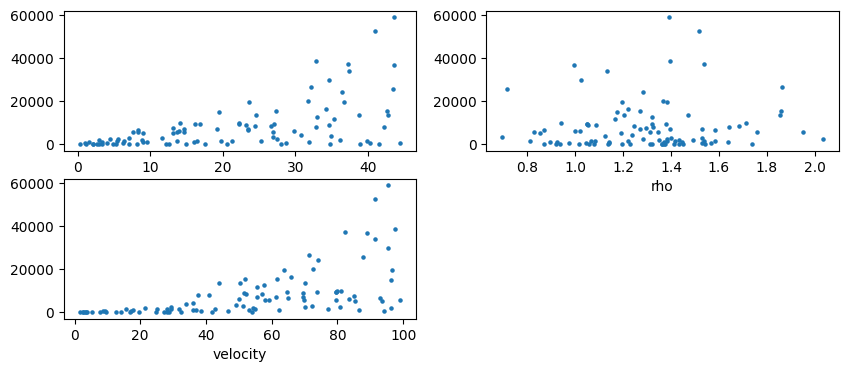

In [15]:
plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
plt.scatter(df['alpha'], df['f_drag'], s=5)
plt.xlabel("alpha")
plt.subplot(2,2,2)
plt.scatter(df['rho'], df['f_drag'], s=5)
plt.xlabel("rho")
plt.subplot(2,2,3)
plt.scatter(df['velocity'], df['f_drag'], s=5)
plt.xlabel("velocity")

In [17]:
df.head()

,alpha,rho,velocity,f_drag
0,16.854305,1.319114,79.481130,9425.204935
1,42.782144,1.203298,50.263709,13722.379248
2,32.939727,1.320528,57.690388,12863.441979
3,26.939632,0.696729,49.251769,3644.076532
4,7.020839,1.227098,19.524299,186.612122


In [78]:
X = df.loc[:, ['alpha', 'rho', 'velocity']]
X['intercept'] = 1
Y = df.loc[:, ['f_drag']]
X.head()

,alpha,rho,velocity,intercept
0,16.854305,1.319114,79.481130,1
1,42.782144,1.203298,50.263709,1
2,32.939727,1.320528,57.690388,1
3,26.939632,0.696729,49.251769,1
4,7.020839,1.227098,19.524299,1


In [79]:
from sklearn.model_selection import train_test_split 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20)

$$ \beta = (X^\top X)^{-1} X^\top Y$$ 

$$ A^{-1} b$$ 
$$ A x = b $$

In [34]:
beta = np.linalg.solve(Xtrain.T @ Xtrain, Xtrain.T @ Ytrain)
beta

array([[   507.04520375],
       [  4316.14040688],
       [   222.22917574],
       [-19920.10002111]])

In [42]:
Yhat_train = (Xtrain @ beta).values
Yhat_test = (Xtest @ beta).values

In [47]:
def MAE(Ytrue, Yhat):
    diff = Yhat - Ytrue 
    return np.mean(np.abs(diff))

print("Training MAE", MAE(Ytrain, Yhat_train))
print("Testing MAE ", MAE(Ytest, Yhat_test))

Training MAE 4826.916601202555
Testing MAE  4517.855187055968


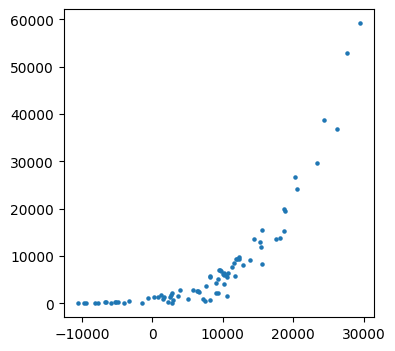

In [50]:
plt.figure(figsize=(4,4))
plt.scatter(Yhat_train, Ytrain, s = 5)

In [56]:
X_df_log = np.log(df[[
    'alpha', 'velocity', 'rho'
]])
X_df_log['intercept'] = 1

Y_df_log = np.log(df[['f_drag']])

X_df_log.head()

,alpha,velocity,rho,intercept
0,2.824606,4.375520,0.276960,1
1,3.756121,3.917283,0.185066,1
2,3.494679,4.055091,0.278032,1
3,3.293599,3.896945,-0.361358,1
4,1.948883,2.971660,0.204652,1


Text(0.5, 0, 'rho')

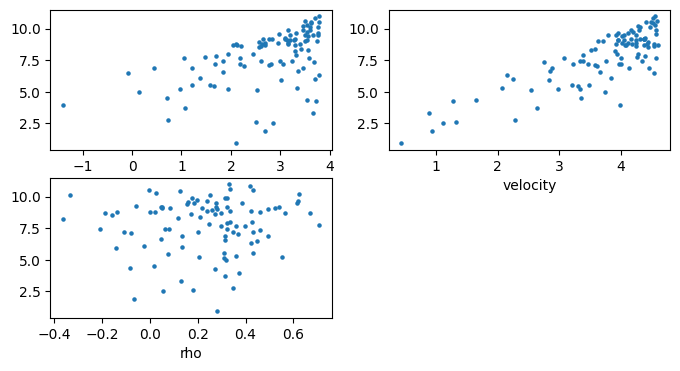

In [59]:
plt.figure(figsize=(8,4))

plt.subplot(2,2,1)
plt.scatter(X_df_log['alpha'], Y_df_log['f_drag'], s=5)
plt.xlabel("alpha")

plt.subplot(2,2,2)
plt.scatter(X_df_log['velocity'], Y_df_log['f_drag'], s=5)
plt.xlabel("velocity")

plt.subplot(2,2,3)
plt.scatter(X_df_log['rho'], Y_df_log['f_drag'], s=5)
plt.xlabel("rho")

In [60]:
from sklearn.model_selection import train_test_split 

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_df_log, Y_df_log, test_size=0.20)

In [61]:
beta = np.linalg.solve(Xtrain.T @ Xtrain, Xtrain.T @ Ytrain)
beta

array([[ 1.20849868],
       [ 1.96678208],
       [ 1.01556185],
       [-3.05985718]])

In [64]:
Yhat_train = Xtrain @ beta 
Yhat_test = Xtest @ beta

In [68]:
Ytrain

,f_drag
53,6.018816
40,7.839951
43,10.876674
30,9.647889
8,9.158196
...,...
50,10.514695
60,2.540040
49,8.689503
31,8.663174


In [69]:
print("Training MAE", MAE(np.exp(Ytrain.values), np.exp(Yhat_train.values)))
print("Testing MAE ", MAE(np.exp(Ytest.values), np.exp(Yhat_test.values)))

Training MAE 832.1238914975875
Testing MAE  346.87102632417384


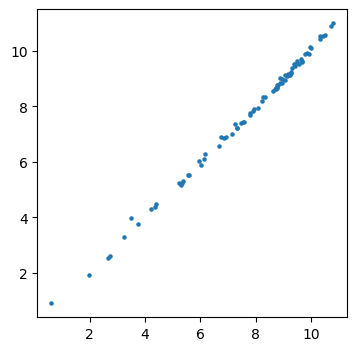

In [70]:
plt.figure(figsize=(4,4))
plt.scatter(Yhat_train, Ytrain, s = 5)

In [89]:
X = df.loc[:, ['alpha', 'rho', 'velocity']]
X['intercept'] = 1
Y = df.loc[:, ['f_drag']]
X.head()

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.20)

from sklearn.preprocessing import PolynomialFeatures 

features = PolynomialFeatures(degree = 10)
Xtrain = features.fit_transform(Xtrain)
Xtrain.shape

(80, 1001)

In [90]:
Xtest = features.transform(Xtest)

In [91]:
Xtest.shape

(20, 1001)

In [92]:
beta = np.linalg.solve(Xtrain.T @ Xtrain, Xtrain.T @ Ytrain)
beta

LinAlgError: Singular matrix

In [94]:
beta = np.linalg.lstsq(Xtrain, Ytrain, rcond=None)[0]

print(beta.shape)
beta 

(1001, 1)


array([[ 3.33528484e-13],
       [ 5.89582259e-13],
       [ 7.61722079e-14],
       ...,
       [-2.19664423e-12],
       [-8.79841321e-14],
       [-4.18115735e-15]])

In [97]:
Yhat_train = Xtrain @ beta 
Yhat_test = Xtest @ beta

print("Training MAE", MAE(Ytrain, Yhat_train))
print("Testing MAE ", MAE(Ytest, Yhat_test))

Training MAE 2.559778940147241
Testing MAE  24581.307827670484


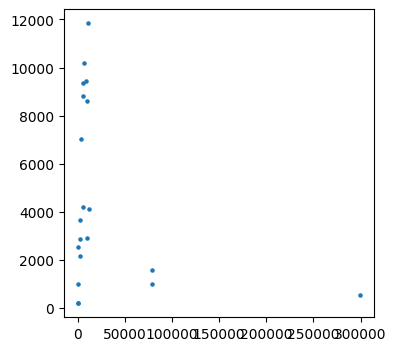

In [98]:
plt.figure(figsize=(4,4))
plt.scatter(Yhat_test, Ytest, s = 5)